In [2]:
import pickle
import numpy as np

pathtopicklefile = '/Users/jcoleman/UFL Dropbox/Jason Coleman/PYTHONdb/LAbisambra/pizzi python code/data_dict.pkl'

with open(pathtopicklefile, 'rb') as file:
    data_dict_z1 = pickle.load(file)

In [3]:
def parse_data(data):
    """
    Parse the given XYZ data into a numpy array.
    """
    data = np.array(data)
    return data

def return_parsed_arrays(data, data_dict_key):
    """
    Main function to loop through data sets (eg data_dict), plot, and perform clustering.
    """
    data_arrays=dict()
    for key in data['AnalysisStruct']['Z1']:
        data_variable = data['AnalysisStruct']['Z1'][key][data_dict_key]
        parsed_data = parse_data(data_variable)
        #plot_3d_scatter(parsed_data, title=f"3D Scatter Plot for {key}")
        data_arrays[key] = parsed_data
    return data_arrays

dict_variable_names = ['FeFv',
                    'XYZ3D',
                    'XYcoords',
                    'Zcoords',
                    'Zmicrons',
                    'foldFe',
                    'fwhm_Pv_vars',
                    'fwhm_flanking_intDen',
                    'fwhm_flanking_mean',
                    'maxFe',
                    'mean_FWHM_pix',
                    'mean_FWHM_ums',
                    'roiID',
                    'roiT_FWHM_pix',
                    'roiT_FWHM_ums',
                    'roiT_fwhm_flanking_tData', 
                    'roiT_profiles']

data_xyz3d = return_parsed_arrays(data_dict_z1, 'XYZ3D')
data_fefv = return_parsed_arrays(data_dict_z1, 'FeFv')
data_fwhm_ums = return_parsed_arrays(data_dict_z1, 'mean_FWHM_ums')

In [4]:
print(data_xyz3d.keys())
print(data_fefv.keys())
print(data_fwhm_ums.keys())

dict_keys(['m10_roi1_00001', 'm11_roi1_00001', 'm12_roi1_00001', 'm13_roi1_00002', 'm15_roi1_00001', 'm16_roi1_00001', 'm5_roi2_00003', 'm6_roi1_00001', 'm7_roi1_00001', 'm9_roi1_00002'])
dict_keys(['m10_roi1_00001', 'm11_roi1_00001', 'm12_roi1_00001', 'm13_roi1_00002', 'm15_roi1_00001', 'm16_roi1_00001', 'm5_roi2_00003', 'm6_roi1_00001', 'm7_roi1_00001', 'm9_roi1_00002'])
dict_keys(['m10_roi1_00001', 'm11_roi1_00001', 'm12_roi1_00001', 'm13_roi1_00002', 'm15_roi1_00001', 'm16_roi1_00001', 'm5_roi2_00003', 'm6_roi1_00001', 'm7_roi1_00001', 'm9_roi1_00002'])


In [51]:
#create data1 and data2 vectors

# data_fefv_subjectmean = dict()
# for key in data_fefv:
#     #subject_id = 'm10_roi1_00001'

#     values = data_fefv[key]

#     data_fefv_subjectmean[key] = np.nanmean(values)
    
# print(data_fefv_subjectmean)

def dict_to_grouparrays(data_metric_dict):
    grpA = ('m5', 'm6', 'm9', 'm10', 'm11', 'm12') #% codes from Pizzi
    grpB = ('m7', 'm13', 'm15', 'm16') #% codes from Pizzi
    # data1 = [[groupA indices]]
    # data2 = [[groupB indices]]
    data1dict = {k: v for k, v in data_metric_dict.items() if k.startswith(grpA)}
    data2dict = {k: v for k, v in data_metric_dict.items() if k.startswith(grpB)}

    #print(grpA)
    data1array = np.array(list(data1dict.values()))
    #print(grpB)
    data2array = np.array(list(data2dict.values()))
    
    return data1array, data2array


MetricID = 'mean_FWHM_ums'
data1, data2 = dict_to_grouparrays(data_fwhm_ums)
# MetricID = 'FeFv'
# data1, data2 = dict_to_grouparrays(data_fefv)

/var/folders/bh/28kxn85n7dzd4095hz5d9rpnf092bp/T/ipykernel_92053/3319795669.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data1array = np.array(list(data1dict.values()))
/var/folders/bh/28kxn85n7dzd4095hz5d9rpnf092bp/T/ipykernel_92053/3319795669.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data2array = np.array(list(data2dict.values()))


In [52]:
# PREFERRED CUMUL PLOT METHOD AS OF 5-13-24

import numpy as np
import matplotlib.pyplot as plt

def plot_cumulative_probability(group1_data, group2_data, figure_filename, bins=30, figsize=(8, 6), font_size=12):
    """
    Plot cumulative probability histograms of two groups of input data side by side.

    Parameters:
    - group1_data: Array-like, data for Group 1.
    - group2_data: Array-like, data for Group 2.
    - bins: int or sequence of scalars or str, optional (default=30)
            If an integer, defines the number of equal-width bins in the range.
            If a sequence, defines the bin edges, including the rightmost edge, allowing for non-uniform bin widths.
            If a string, it defines the method used to calculate the optimal bin width, as defined by `np.histogram_bin_edges`.
    - figsize: tuple, optional (default=(8, 6))
               Width, height in inches.
    - font_size: int or float, optional (default=12)
                 Font size.
    """
    # Set font type and size
    plt.rcParams.update({'font.family': 'Arial', 'font.style': 'normal', 'font.size': font_size})

    # Calculate the bin edges
    hist_range = (min(min(group1_data), min(group2_data)), max(max(group1_data), max(group2_data)))
    bins = np.linspace(*hist_range, bins)

    # Create subplots
    fig, ax = plt.subplots(figsize=figsize)

    # Plot cumulative probability histograms for both groups
    weights1_prob = np.ones_like(group1_data) / len(group1_data)
    weights2_prob = np.ones_like(group2_data) / len(group2_data)

    ax.hist(group1_data, bins=bins, color='black', alpha=0.5, cumulative=True, weights=weights1_prob, label='Group 1', histtype='step', linewidth=2)
    ax.hist(group2_data, bins=bins, color='red', alpha=0.5, cumulative=True, weights=weights2_prob, label='Group 2', histtype='step', linewidth=2)
    
    # Set labels and title
    ax.set_xlabel(MetricID, fontsize=font_size)
    ax.set_ylabel('Cumulative Probability', fontsize=font_size)
    ax.set_title('Cumulative Probability Histograms of Group A and Group B', fontsize=font_size)

    # Add legends for both groups
    plt.legend(['Group A', 'Group B'], frameon=False, loc='upper left')
    
    # BETTER WAY??? White-out the last vertical line for asthetics
    whiteout_line_xloc  = max(max(group1_data), max(group2_data))
    ax.axvline(x = whiteout_line_xloc, color = 'white', linewidth = 2, alpha=1.0)
    
    # Save the plot as a PDF file
    plt.savefig(figure_filename + '.pdf', format='pdf', dpi=300) #, bbox_inches='tight')
    
    # Save the plot as an EPS file
    plt.savefig(figure_filename + '.eps', format='eps', dpi=300) #, bbox_inches='tight')
    
    # Save the plot as a PNG file
    plt.savefig(figure_filename + '.png', format='PNG', dpi=300) #, bbox_inches='tight')
    
    # Save the plot as a TIF file
    #plt.savefig('example_plot.tiff', format='tiff', dpi=300)

    plt.show()

# Example usage:
# group1_data = np.random.normal(loc=0, scale=1, size=1000)
# group2_data = np.random.normal(loc=2, scale=1.5, size=1000)
# plot_cumulative_probability(data1, data2, figsize=(10, 8), font_size=14)

In [53]:
temp1 = np.concatenate(data1, axis=0)
temp2 = np.concatenate(data2, axis=0)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


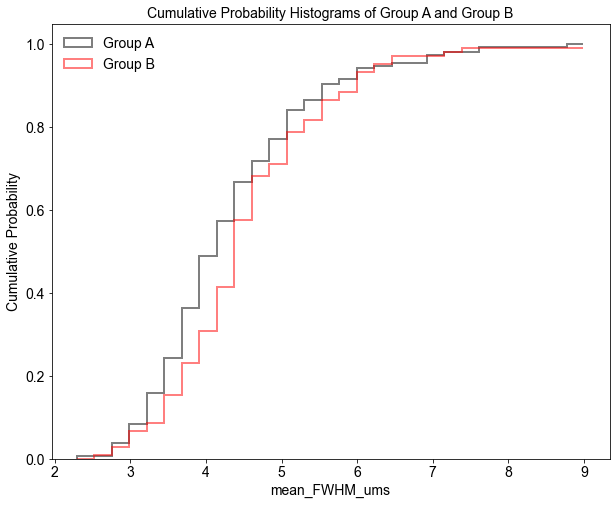

In [54]:
plot_cumulative_probability(temp1, temp2, 'cdfplots_fwhm_ums', figsize=(10, 8), font_size=14)

In [55]:
from scipy.stats import ks_2samp

ks_2samp(temp1, temp2)

# """
# All statistical analyses were performed using R (
# http://www.r-project.org
# /) or MATLAB. Cilia lengths were analyzed using the two-sample Kolmogorov-Smirnov (K-S) test.
# For the K-S tests we applied a Bonferroni correction for the number of regions analyzed within each
# brain to the standard p value of 0.05. Thus, for PTZ experiments, we set the statistical significance at
# p < 0.008 for Arl13b + (glial) cilia and p < 0.007 for ACIII + (neuronal) cilia measurements.
# For KA experiments, statistical significance for K-S tests was set at p < 0.012.
# """

KstestResult(statistic=0.19187898089171976, pvalue=0.016753559176772126)

In [ ]:
# get Z value only
